<a href="https://colab.research.google.com/github/dianamva/erp-system/blob/main/titanic_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as s
import statistics as ss
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

In [ ]:
#1
data = pd.read_csv('titanic.csv')

In [ ]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#2
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data['Cabin'].mode()[0]

'B96 B98'

In [ ]:
data['Cabin'].fillna(data['Cabin'].mode()[0], inplace=True)

In [ ]:
data['Age'].fillna(data['Age'].mean(), inplace= True)

In [ ]:
data.dropna(inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [ ]:
#3
data.drop(['Name', 'PassengerId'], axis = 1, inplace= True)


In [ ]:
le  = LabelEncoder()

In [ ]:
data['Sex_Encoded'] = le.fit_transform(data["Sex"])
data['Ticket_Encoded'] = le.fit_transform(data["Ticket"])
data['Cabin_Encoded'] = le.fit_transform(data["Cabin"])
data['Embarked_Encoded'] = le.fit_transform(data["Embarked"])

In [ ]:
#4
sc = StandardScaler()

In [ ]:
data['Age_scaled'] = sc.fit_transform(data[['Age']])
data['Fare_scaled'] = sc.fit_transform(data[['Fare']])

In [ ]:
#5
data.drop('Sex',axis=1, inplace=True)
data.drop('Age',axis=1, inplace=True)
data.drop('Ticket',axis=1, inplace=True)
data.drop('Cabin',axis=1, inplace=True)
data.drop('Embarked',axis=1, inplace=True)
data.drop('Fare',axis=1, inplace=True)

In [ ]:
data

,Survived,Pclass,SibSp,Parch,Sex_Encoded,Ticket_Encoded,Cabin_Encoded,Embarked_Encoded,Age_scaled,Fare_scaled
0,0,3,1,0,1,522,46,2,-0.590495,-0.500240
1,1,1,1,0,0,595,80,0,0.643971,0.788947
2,1,3,0,0,0,668,46,2,-0.281878,-0.486650
3,1,1,1,0,0,48,54,2,0.412509,0.422861
4,0,3,0,0,1,471,46,2,0.412509,-0.484133
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,1,100,46,2,-0.204724,-0.384475
887,1,1,0,0,0,14,29,2,-0.821957,-0.042213
888,0,3,1,2,0,674,46,2,0.003524,-0.174084
889,1,1,0,0,1,8,59,0,-0.281878,-0.042213


<Axes: >

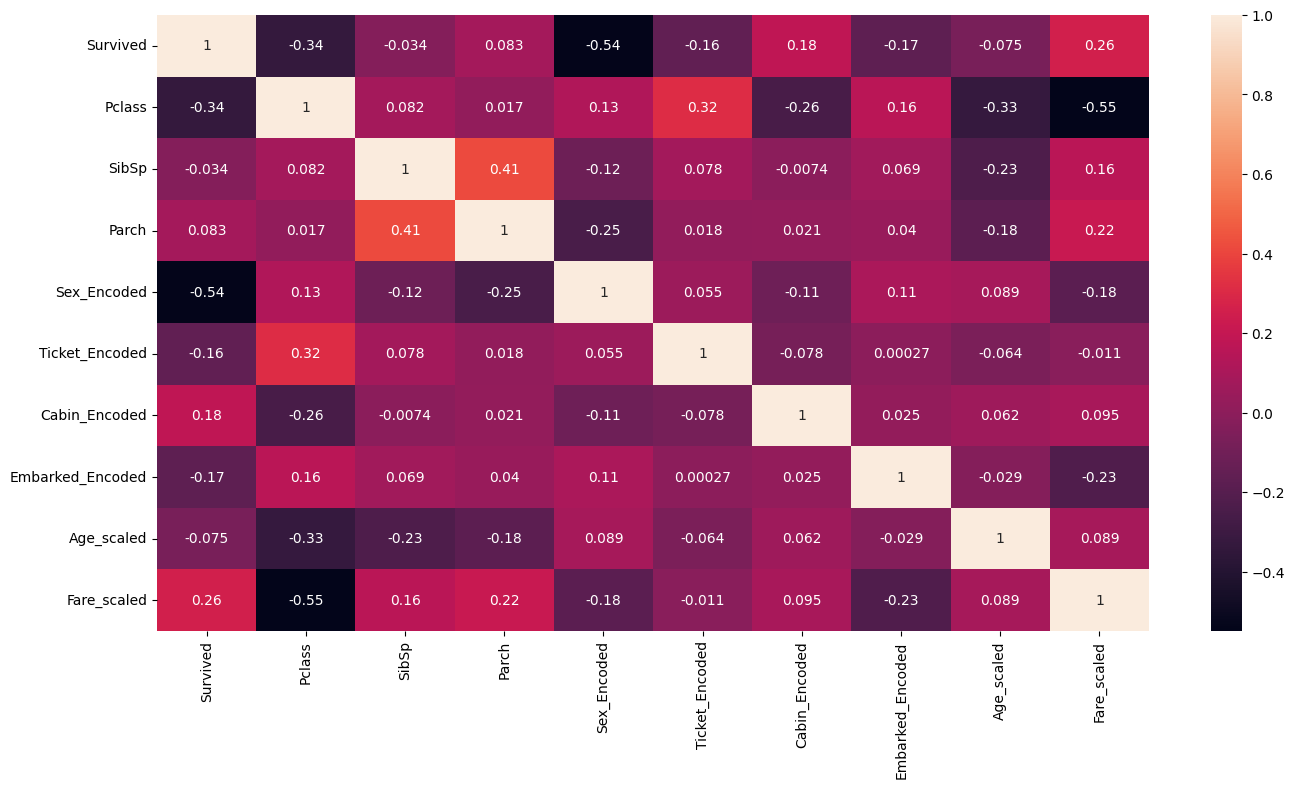

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(), annot=True)

In [ ]:
X = data.drop('Survived', axis=1)
y = data['Survived']

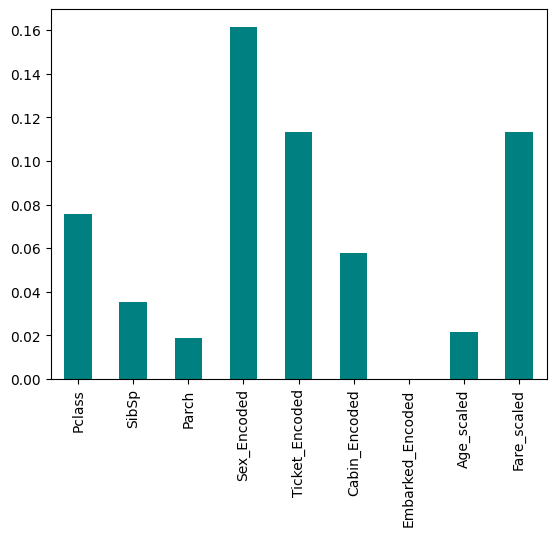

In [ ]:
imp = mutual_info_classif(X,y)
imp_ser = pd.Series(imp, X.columns)
imp_ser.plot(kind = 'bar', color = 'teal')
plt.show()

In [ ]:
#6
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr_model = LogisticRegression()

In [ ]:
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lr_model.predict(X_test)

In [ ]:
#7
from sklearn.metrics import accuracy_score

In [ ]:
round(accuracy_score(y_test, y_pred),2)

0.8

In [ ]:
# 8
X_train = X_train.drop(['Parch','Embarked_Encoded','Age_scaled'], axis=1)
X_test = X_test.drop(['Parch','Embarked_Encoded','Age_scaled'], axis=1)

In [ ]:
lr_model_v2 = LogisticRegression()

In [ ]:
lr_model_v2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lr_model_v2.predict(X_test)

In [ ]:
round(accuracy_score(y_test, y_pred),2)

0.8

In [ ]:
X_train = X_train.drop(['SibSp'], axis=1)
X_test = X_test.drop(['SibSp'], axis=1)
lr_model_v3 = LogisticRegression()
lr_model_v3.fit(X_train, y_train)
y_pred = lr_model_v3.predict(X_test)
round(accuracy_score(y_test, y_pred),2)

0.8